In [4]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load in csv
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
grouper = city_df.groupby('city')
res = grouper.count()
res['driver_count']= grouper.sum()['driver_count']
del res['type']
res = res.reset_index()
mergecity = pd.merge(res, city_df, on="city")
city = mergecity.drop(mergecity.index[73])
del city['driver_count_y']
city.reset_index()
city.head()

,city,driver_count_x,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [8]:
merge = pd.merge(city, ride_df, on="city")
merge.reset_index()
merge.head()

,city,driver_count_x,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [9]:
city_grp = merge.groupby('city')
city_cnt = city_grp["ride_id"].count()
avg_fare = city_grp["fare"].mean()
drv_cnt = city_grp['driver_count_x'].mean()
city_type = city_grp['type'].first()
Sum_city = pd.DataFrame({'Rides Per City':city_cnt, 'Avg Fare':avg_fare,'Drivers Per City':drv_cnt,'City Type':city_type})
Sum_city.reset_index()
Sum_city.head()

,Avg Fare,City Type,Drivers Per City,Rides Per City
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


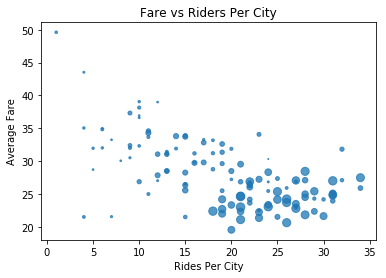

In [10]:
plt.scatter(Sum_city['Rides Per City'], Sum_city['Avg Fare'] , marker="o",
            s= Sum_city['Drivers Per City'], alpha=0.75)
plt.title("Fare vs Riders Per City")
plt.ylabel("Average Fare")
plt.xlabel("Rides Per City")

plt.show()

In [19]:
city_pi = merge.groupby('type')
pi_ride = city_pi["ride_id"].count()

Pi_city = pd.DataFrame({'Rides Per City':pi_ride})
Pi_city.reset_index()
Pi_city.head()

,Rides Per City
type,
Rural,125
Suburban,625
Urban,1625


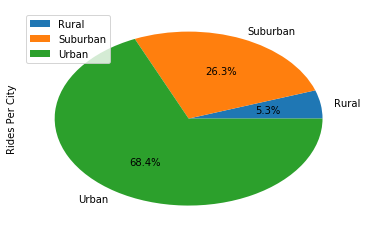

In [21]:
Pi_city.plot.pie(y="Rides Per City", autopct="%1.1f%%")

In [22]:
city_pi = merge.groupby('type')
pi_fare = city_pi["fare"].sum()

Pi_city = pd.DataFrame({'Avg Fare':pi_fare})
Pi_city.reset_index()
Pi_city.head()

,Avg Fare
type,
Rural,4255.09
Suburban,19317.88
Urban,40078.34


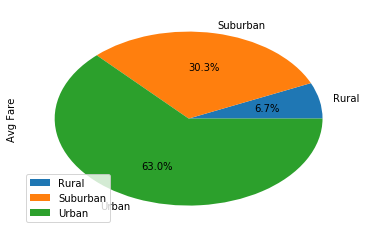

In [23]:
Pi_city.plot.pie(y="Avg Fare", autopct="%1.1f%%")

In [24]:
city_pi = merge.groupby('type')
pi_drv = city_pi['driver_count_x'].mean()

Pi_city = pd.DataFrame({'Drivers Per City':pi_drv})
Pi_city.reset_index()
Pi_city.head()

,Drivers Per City
type,
Rural,5.816000
Suburban,15.568000
Urban,39.692923


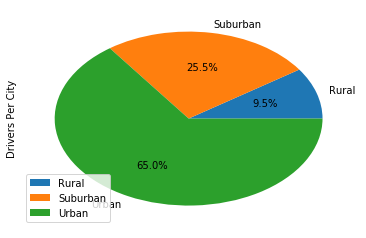

In [26]:
Pi_city.plot.pie(y="Drivers Per City", autopct="%1.1f%%")